In [1]:
import numpy as np
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros import actions
from gym import Wrapper
import matplotlib.pyplot as plt
import collections
from collections import deque
import random
import gym
from clases import wrap_nes
import torch

In [2]:
env = wrap_nes("SuperMarioBros-1-2-v0", actions.SIMPLE_MOVEMENT)

In [29]:
from torch import nn
class Model(nn.Module):
    def __init__(observation_space, action_space):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(observation_space, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(512, action_space),
            nn.ReLU()
        )

In [30]:
clf = Model(env.observation_space.shape, env.action_space.n) 
clf.to(torch.device("cuda:0"))

TypeError: __init__() takes 2 positional arguments but 3 were given

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)

In [5]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

AttributeError: module 'keras.backend' has no attribute 'tensorflow_backend'

In [9]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [10]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3693430766204726633
]


In [2]:
env = gym_super_mario_bros.make('SuperMarioBros-1-1-v0')
env = JoypadSpace(env, actions.SIMPLE_MOVEMENT)

Vamos a ver los estados y las acciones que se pueden realizar

In [25]:
env.observation_space
# Tenemos imagenes RGB de 240x256 pixeles

Box(0, 255, (240, 256, 3), uint8)

In [26]:
env.action_space.n

7

<img src="combinaciones.png"/>

Las 12 acciones corresponden a la siguiente combinación de botones:

- ['NOOP']
- ['right']
- ['right', 'A']
- ['right', 'B']
- ['right', 'A', 'B']
- ['A']
- ['left']
- ['left', 'A']
- ['left', 'B']
- ['left', 'A', 'B']
- ['down']
- ['up']

Vemos los siguientes atributos

Estado: (240, 256, 3), Recompensa: 0.0, Done: False
Estado: (240, 256, 3), Recompensa: 2.0, Done: False
Estado: (240, 256, 3), Recompensa: 2.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 0.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 0.0, Done: False
Estado: (240, 256, 3), Recompensa: 0.0, Done: False
Estado: (240, 256, 3), Recompensa: 0.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 0.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 0.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 1.0, Done: False
Estado: (240, 256, 3), Recompensa: 2.0, Done: False
Estado: (240

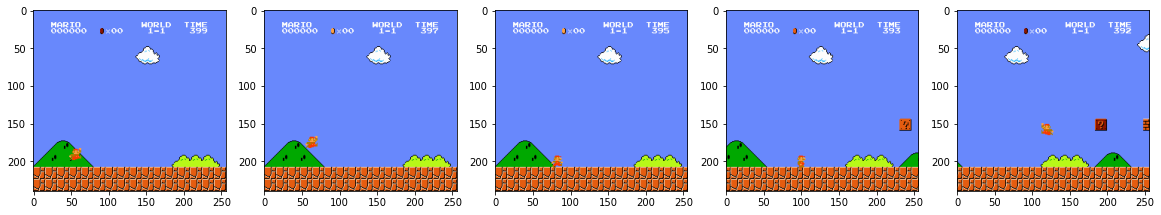

In [108]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 5))

env.reset()

done = False
for i in range(50):
    if i % 10:
        state, reward, done, _ = env.step(env.action_space.sample()) # Ejecuta una acción aleatoria
        print(f'Estado: {state.shape}, Recompensa: {reward}, Done: {done}')
        ax[i//10].imshow(state)

In [110]:
import random
episodes = 5

for i in range(episodes):
    env.reset()
    done = False
    score = 0
    while not done:
        action = random.choice(np.arange(0, 7))
        state, reward, done, _ = env.step(action)
        score += reward
    print(f'Episode: {i + 1} -> Score: {score}')


Episode: 1 -> Score: 1009.0
Episode: 2 -> Score: 230.0
Episode: 3 -> Score: 587.0
Episode: 4 -> Score: 543.0
Episode: 5 -> Score: 794.0


In [23]:
env = wrap_nes("SuperMarioBros-1-2-v0", actions.SIMPLE_MOVEMENT)

In [40]:
#Deepmind

def deepmind_model(input_shape, output_size):

    model = keras.Sequential()
    
    model.add(keras.layers.Conv2D(32, 8, strides=4, activation="relu", input_shape=input_shape))
    model.add(keras.layers.Conv2D(32, 8, strides=4, activation="relu"))
    model.add(keras.layers.Conv2D(64, 4, strides=2, activation="relu"))
    #model.add(keras.layers.Conv2D(64, 3, strides=1, activation="relu"))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation="relu", input_shape=input_shape)) #
    model.add(keras.layers.Dense(output_size, activation="linear"))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0001),
        loss= keras.losses.MeanSquaredError(),
        metrics=['mse']
    )

    return model

In [41]:
def epsilon_greedy(epsilon, model, state):
    '''Exploración vs predicción'''
    random = np.random.uniform(0, 1, size=1)
    if (1 - epsilon) > random:
        action = model.predict(state)
    else:
        action = env.action_space.sample()
    
    epsilon *= 0.99
    epsilon = max(epsilon, 0.01)

    return action, epsilon

In [42]:
model = deepmind_model(input_shape=env.observation_space.shape, output_size=env.action_space.n)
target_model = deepmind_model(input_shape=env.observation_space.shape, output_size=env.action_space.n)


target = γ * maxaQ(s′,a′,θ) + rt 

In [45]:
episode = 1000
gamma = 0.95
epsilon = 1
epsilon_decay = 0.999
state_memory = deque(maxlen=20000)
action_memory = deque(maxlen=20000)
reward_memory = deque(maxlen=20000)
new_state_memory = deque(maxlen=20000)
done_memory = deque(maxlen=20000)
frame_count = 0
score_list = []
batch_size = 4


In [46]:
def memory_replay(model, target_model, memory, batch_size, gamma, state_memory, action_memory, reward_memory, new_state_memory, done_memory):
    if len(memory) < batch_size: 
        return None
    else:
        #samples = random.sample(memory, batch_size)
        #states = np.array([sample[0] for sample in samples])
        #next_state = np.array([sample[3] for sample in samples])

        idx = random.choices(range(len(memory)), k=batch_size)
        
        STATE = torch.tensor(state_memory[idx]).cuda()
        ACTION = torch.tensor(action_memory[idx]).cuda()
        REWARD = torch.tensor(reward_memory[idx]).cuda()
        STATE2 = torch.tensor(new_state_memory[idx]).cuda()
        DONE = torch.tensor(done_memory[idx]).cuda()

        current_q_list = [model.predict(np.expand_dims(i, 0), batch_size=batch_size)[0] for i in states]
        future_q_list = [target_model.predict(np.expand_dims(i, 0), batch_size=batch_size)[0] for i in next_state]

        X = []
        y = []

        
        for index, (current_state, action, reward, new_current_state, done) in enumerate(samples):

            
            if not done:
                max_future_q = np.max(future_q_list[index])
                new_q = reward + gamma * max_future_q
            else:
                new_q = reward

            current_q = current_q_list[index]
            current_q[action] = new_q

            X.append(current_state)
            y.append(current_q)

            
        
        model.fit(x = np.array(X),
                y = np.array(y),
                batch_size = batch_size, verbose = 0,
                shuffle=False)


        inputs, targets = data
        optimizer.zero_grad()
        outputs = mlp(inputs)
        loss = loss_function(outputs, targets)
        loss.backward()
        optimizer.step()


In [55]:
#env = gym_super_mario_bros.make('SuperMarioBros-1-1-v0')
#env = make_env(env)
#env = gym_super_mario_bros.make('SuperMarioBros-1-1-v0')
#env = JoypadSpace(env, actions.SIMPLE_MOVEMENT)
env = wrap_nes("SuperMarioBros-1-2-v0", actions.SIMPLE_MOVEMENT)


for i in range(1, 250):
    score = 0   
    done = False
    state = env.reset()
    state = np.array(state)
    for u in range(env.spec.max_episode_steps):
        
        if frame_count%1000==0:
            target_model.set_weights(model.get_weights())  # Doble Q learning
        #env.render(mode='human')
        
        random_number = random.uniform(0, 1)
        if (1 - epsilon) >= random_number:
            action = np.argmax(model.predict(np.expand_dims(state, 0)))
        else:
            action = env.action_space.sample()
        
        new_state, reward, done, _ = env.step(action)
        new_state = np.array(new_state)
        score += reward

        
        #target = target_model.predict(np.expand_dims(new_state, 0))
        #if not done:
        #    target[0][action] = reward + (gamma * max(target_model.predict(np.expand_dims(new_state, 0))[0]))
        #else:
        #    target[0][action] = reward
        #model.fit(np.expand_dims(state, 0), np.array(target), verbose=0)


        
        memory.append([state, action, reward, new_state, done])
        if frame_count % 4 == 0:
            memory_replay(model=model, target_model=target_model, memory=memory, batch_size=batch_size, gamma=gamma)
        state = new_state
        frame_count += 1
        if done:
            break

    if i % 10 == 0:
        model.save('intento_serio.h5')
        print(f'Episode: {i} --> Score {score}')
        print('epsilon: ', epsilon)
        print('frame_count: ', frame_count)
    epsilon *= epsilon_decay
    epsilon = max(epsilon, 0.02)
    score_list.append(score)
    
    

env.close()


Episode: 10 --> Score 54.45000000000006
epsilon:  0.3643993721431843
frame_count:  223158
Episode: 20 --> Score 4.799999999999998
epsilon:  0.36077173274200636
frame_count:  224034
Episode: 30 --> Score 53.45000000000004
epsilon:  0.3571802069256231
frame_count:  225655
Episode: 40 --> Score -1.1500000000000012
epsilon:  0.3536244351789717
frame_count:  226546
Episode: 50 --> Score 6.199999999999998
epsilon:  0.350104061566005
frame_count:  227535
Episode: 60 --> Score 52.05000000000004
epsilon:  0.3466187336940617
frame_count:  228837
Episode: 70 --> Score 7.799999999999999
epsilon:  0.34316810267859194
frame_count:  229710
Episode: 80 --> Score 1.6500000000000012
epsilon:  0.3397518231082331
frame_count:  230928
Episode: 90 --> Score 7.249999999999998
epsilon:  0.33636955301023425
frame_count:  231380
Episode: 100 --> Score 34.300000000000026
epsilon:  0.3330209538162239
frame_count:  232448
Episode: 110 --> Score 54.10000000000001
epsilon:  0.32970569032831953
frame_count:  233831
E

KeyboardInterrupt: 

In [48]:
model.save('tercer_intento.h5')

In [49]:
len(score_list)

1000

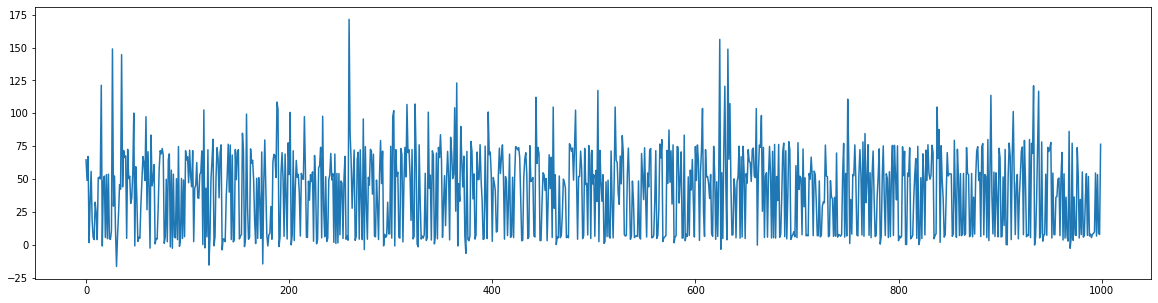

In [50]:
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot([x for x in range(1000)], score_list)

In [23]:
#model = keras.models.load_model('primer_intento.h5')

In [54]:
env = wrap_nes("SuperMarioBros-1-2-v0", actions.SIMPLE_MOVEMENT)


state = np.array(env.reset())

done = False
score = 0
while not done:
    env.render()
    action = np.argmax(model.predict(np.expand_dims(state, 0)))
    new_state, reward, done, _ = env.step(action)
    state = new_state
    score += reward
print(f'Score: {score}')
env.close()


Score: 8.699999999999996


In [16]:
env.close()

In [32]:
len(memory)

64

In [35]:
import sys
sys.getsizeof(memory)


1168